In [162]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [163]:
df_ = pd.read_csv("../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
df = df_.copy()
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.000,0,1,Yes,Private,Urban,228.690,36.600,formerly smoked,1
1,51676,Female,61.000,0,0,Yes,Self-employed,Rural,202.210,NaN,never smoked,1
2,31112,Male,80.000,0,1,Yes,Private,Rural,105.920,32.500,never smoked,1
3,60182,Female,49.000,0,0,Yes,Private,Urban,171.230,34.400,smokes,1
4,1665,Female,79.000,1,0,Yes,Self-employed,Rural,174.120,24.000,never smoked,1


In [164]:
"""
1) id               (num,int)     : Hasta idleri.  unique
2) gender           (cat,nom)     : Cinsiyet.  "Male", "Female" or "Other"(Other--> bilinmiyor mu yoksa başka bir şey mi?)
3) age              (num,int)     : Hastanın yaşı
4) hypertension     (cat,nom)     : Hastanın hipertansiyonu varsa 1, yoksa 0
5) heart_disease    (cat,nom)     : Hastanın kalp rahatsızlığı varsa 1, yoksa 0
6) ever_married     (cat,nom)     : Hiç evlendi mi? "No" or "Yes"
7) work_type        (cat,nom)     : "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type   (cat,nom)     : Yaşadığı bölge: Kırsal , kentsel -- "Rural" or "Urban"
9) avg_glucose_level(num,float)   : Kandaki ortalama glikoz seviyesi
10) bmi             (num,float)   : vücut kitle endeksi
11) smoking_status  (cat,nom)     : Sigara içme durumu "formerly smoked", "never smoked", "smokes" or "Unknown"*
# ÖNEMLİ NOT                      : *Note: "Unknown" in smoking_status means that the information is unavailable for this patient
12) stroke          (cat,nom)     : Kişi felç geçirdi ise 1 , geçirmedi ise 0


######
HIPERTENSION
Kan basıncının 140/90 mm Hhg üzerinde olması hipertansiyon hastası olabileceğinizi gösteri

Hipertansiyonun ortaya çıkış nedenleri arasında genetik yatkınlık ve aşırı tuz tüketimi ilk sıralarda yer alırken hastaların büyük bir bölümünde yüksek tansiyon nedeni belli değildir
Yüksek tansiyonun görülme sıklığı 50 yaşında altındaki erkeklerde, 55 yaşından sonra ise kadınlarda daha fazladır.
Genetik yatkınlık: Yüksek tansiyon hastalarının yaklaşık %60’ının ailesinde de tansiyon yüksekliği görülür.

Obezite: Aşırı kilosu olanların yaklaşık %40'ında yüksek tansiyon görülmektedir.

Diyabet (şeker hastalığı): Şeker hastalarında yüksek tansiyona çok sık görülmektedir.

Aşırı tuz tüketimi: Yüksek tansiyona yol açan nedenlerden biridir.

Hareketsiz yaşam biçimi: Hareketsizlik yüksek tansiyon görülme olasılığını artırır.

Sigara-alkol tüketimi: Yüksek tansiyon görülme sıklığı artar.

Stres: Yüksek tansiyonun ortaya çıkmasını kolaylaştırabilir.


######
BMI
0 ila 18,4 BMI: Zayıf. Kişinin boyuna oranla ağırlığının yetersiz olduğunu ifade eden bu değer ile karşılaşılması durumunda kişinin diyetisyen eşliğinde sağlıklı bir şekilde kilo alması önerilir.
18.5 ila 24.9 BMI: Normal. Bu değer aralığı kişinin ideal kiloda olduğunu gösterir. Bu değere sahip olan kişilerin düzenli, dengeli ve sağlıklı beslenmeye devam etmeleri önerilir.
25 ila 29.9 BMI: Fazla Kilolu. Kişinin boyuna oranla kilosunun fazla olduğunu gösteren bu değer aralığında kişinin uygun diyet ile fazla kilolarından kurtulması önerilir.
30 ila 34.9 BMI: Şişman. Birinci derece obez kategorisinde değerlendiren değer aralığında, kişinin kilosunun sağlık açısından risk oluşturabilecek düzeyde olduğu anlaşılır. Bu kişilerin diyetisyen yardımıyla kilo vermesi önerilir.
35 ila 44.9 BMI: Şişman. İkinci derece obez olarak tanımlanan bu değerlere sahip olan kişilerde kalp ve damar hastalıkları bakımından risk artar. Kişinin kilo vermek için diyetisyene başvurması önerilir.
45+ BMI: Aşırı Şişman. Üçüncü derece obez kategorisinde olan bu kişilerde hastalık gelişme riski çok yüksektir. Hekim ve diyetisyen eşliğinde kilo verilmesi önerilir.
Yaş aralığına göre ise kişinin ideal vücut kitle indeksi şu şekildedir:

19-24 Yaş: 19-24 BMI.
25-34 Yaş: 20-25 BMI.
35-44 Yaş: 21-26 BMI.
45-54 Yaş: 22-27 BMI.
55-64 Yaş: 23-28 BMI.
65 Yaş ve üzeri: 24-29 BMI.

##########
STROKE
######### Hemorajik İnme Faktörleri ######

Kontrolsüz yüksek tansiyon
Kan sulandırıcı ilaçlarla aşırı tedaviye maruz kalmak
Kan damarı duvarlarında meydana gelen şişkinlik
Travma
Damar duvarında zayıflığa neden olan protein birikimleri
Kanamaya neden olan iskemik inme
Arteriyovenöz malformasyon


######### İnme Risk Faktörleri #########

Yaşam tarzı risk faktörleri
Fazla kilolu ya da obez olmak
Fiziksel hareketsizlik
Uyuşturucu kullanımı


#########Tıbbi Risk Faktörleri#########

Yüksek tansiyon
Sigara içimi ya da pasif içicilik
Yüksek kolestrol
Diyabet
Obstrüktif uyku apnesi
Kalp yetmezliği, kalp kusurları, kalp enfeksiyonu veya atriyal fibrilasyon gibi kardiyovasküler hastalık
Kişisel veya ailevi inme, kalp kriziveya geçici iskemik atak öyküsü
Kovid-19 enfeksiyonu


# avg_glucose_level
The expected values for normal fasting blood glucose concentration are between 70 mg/dL (3.9 mmol/L) and 
100 mg/dL (5.6 mmol/L). When fasting blood glucose is between 100 to 125 mg/dL (5.6 to 6.9 mmol/L) changes in lifestyle 
and monitoring glycemia are recommended.
"""

'\n1) id               (num,int)     : Hasta idleri.  unique\n2) gender           (cat,nom)     : Cinsiyet.  "Male", "Female" or "Other"(Other--> bilinmiyor mu yoksa başka bir şey mi?)\n3) age              (num,int)     : Hastanın yaşı\n4) hypertension     (cat,nom)     : Hastanın hipertansiyonu varsa 1, yoksa 0\n5) heart_disease    (cat,nom)     : Hastanın kalp rahatsızlığı varsa 1, yoksa 0\n6) ever_married     (cat,nom)     : Hiç evlendi mi? "No" or "Yes"\n7) work_type        (cat,nom)     : "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"\n8) Residence_type   (cat,nom)     : Yaşadığı bölge: Kırsal , kentsel -- "Rural" or "Urban"\n9) avg_glucose_level(num,float)   : Kandaki ortalama glikoz seviyesi\n10) bmi             (num,float)   : vücut kitle endeksi\n11) smoking_status  (cat,nom)     : Sigara içme durumu "formerly smoked", "never smoked", "smokes" or "Unknown"*\n# ÖNEMLİ NOT                      : *Note: "Unknown" in smoking_status means that the information 

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [166]:
df["hypertension"] = df["hypertension"].astype('O')
df["heart_disease"] = df["heart_disease"].astype('O')
df["stroke"] = df["stroke"].astype('O')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   object 
 4   heart_disease      5110 non-null   object 
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 479.2+ KB


In [167]:
df.shape

(5110, 12)

In [168]:
df.duplicated().value_counts()

False    5110
dtype: int64

In [169]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [170]:
df_ = df.drop("id", axis=1)
df_.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.000,43.227,22.613,0.080,25.000,45.000,61.000,82.000
avg_glucose_level,5110.000,106.148,45.284,55.120,77.245,91.885,114.090,271.740
bmi,4909.000,28.893,7.854,10.300,23.500,28.100,33.100,97.600


In [171]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [172]:
 df.isnull().sum()/df.shape[0] * 100

id                  0.000
gender              0.000
age                 0.000
hypertension        0.000
heart_disease       0.000
ever_married        0.000
work_type           0.000
Residence_type      0.000
avg_glucose_level   0.000
bmi                 3.933
smoking_status      0.000
stroke              0.000
dtype: float64

In [173]:
object_col = df.select_dtypes(include='object').columns
for col in object_col:
    print(col)
    print("--"*8)
    print(df[col].value_counts(dropna=False))
    print("--"*20)

gender
----------------
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
----------------------------------------
hypertension
----------------
0    4612
1     498
Name: hypertension, dtype: int64
----------------------------------------
heart_disease
----------------
0    4834
1     276
Name: heart_disease, dtype: int64
----------------------------------------
ever_married
----------------
Yes    3353
No     1757
Name: ever_married, dtype: int64
----------------------------------------
work_type
----------------
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
----------------------------------------
Residence_type
----------------
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
----------------------------------------
smoking_status
----------------
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking

In [174]:
# Target

In [175]:
df.stroke.value_counts(normalize=True)

0   0.951
1   0.049
Name: stroke, dtype: float64

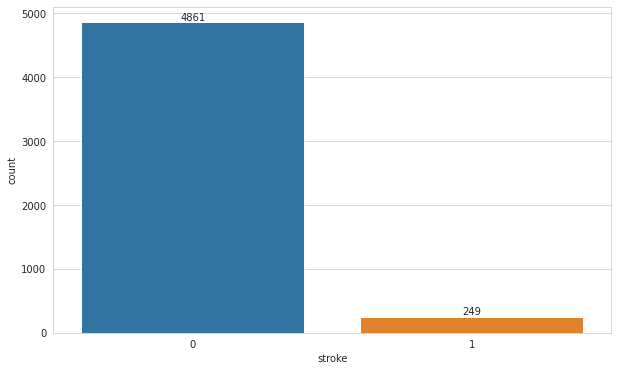

In [176]:
fig, ax = plt.subplots()
ax=snsax=sns.countplot(df.stroke)
ax.bar_label(ax.containers[0]);

In [177]:
df_st_per = df.stroke.value_counts(normalize=True)
df_st_per

0   0.951
1   0.049
Name: stroke, dtype: float64

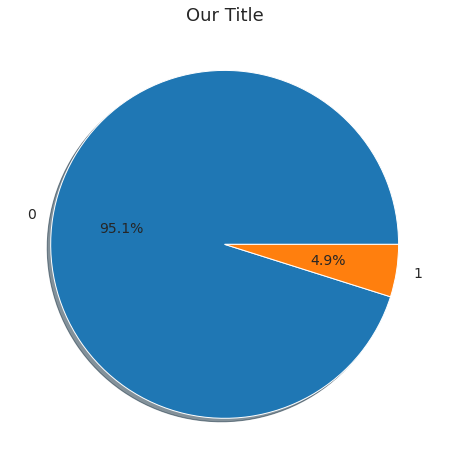

In [178]:
fig, ax = plt.subplots(figsize=(12,8))
labels = df_st_per.index
ax.pie(df_st_per, labels=labels, autopct="%.1f%%", textprops={'fontsize': 14}, shadow=True)
ax.set_title("Our Title", fontsize=18);

In [179]:
# Target vs Numerical

<AxesSubplot:xlabel='bmi'>

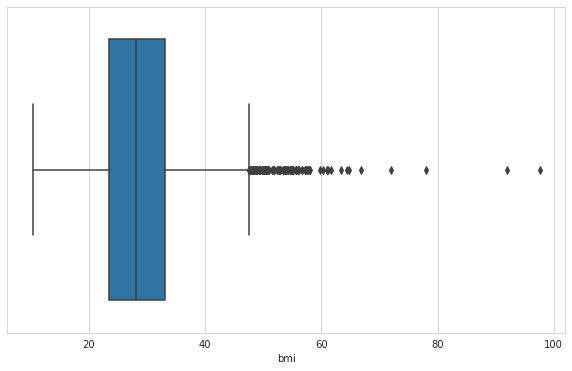

In [180]:
sns.boxplot(df["bmi"])

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

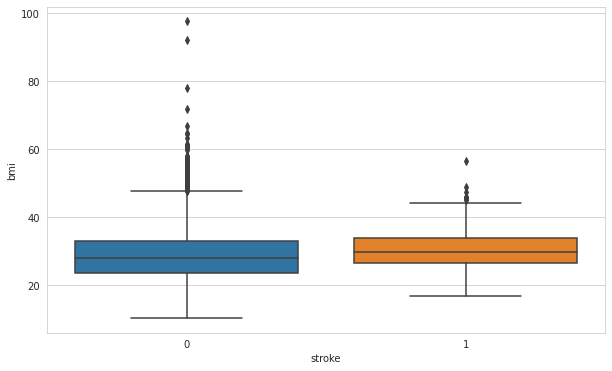

In [181]:
sns.boxplot(x=df["stroke"], y= df["bmi"])

In [182]:
# Yorum : ...

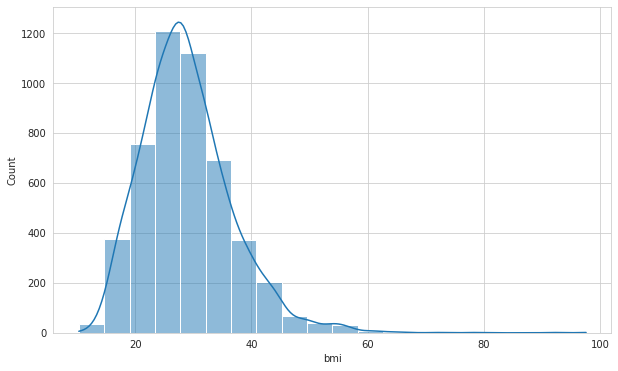

In [183]:
sns.histplot(df["bmi"], bins=20, kde=True);

In [184]:
df["bmi"].describe()

count   4909.000
mean      28.893
std        7.854
min       10.300
25%       23.500
50%       28.100
75%       33.100
max       97.600
Name: bmi, dtype: float64

In [185]:
df.groupby("stroke")["bmi"].mean()

stroke
0   28.823
1   30.471
Name: bmi, dtype: float64

<AxesSubplot:xlabel='bmi', ylabel='Count'>

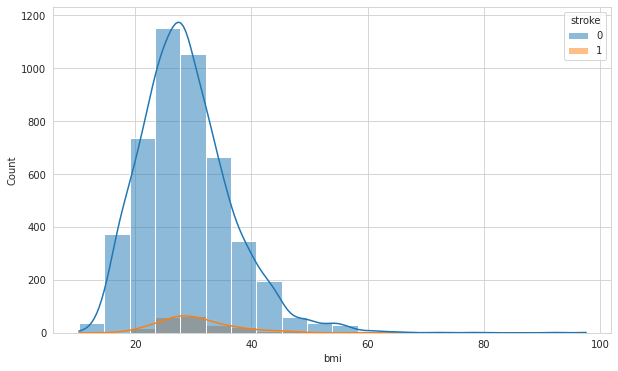

In [186]:
sns.histplot(x="bmi", bins=20, kde=True, hue="stroke", data=df)

<AxesSubplot:xlabel='bmi', ylabel='Density'>

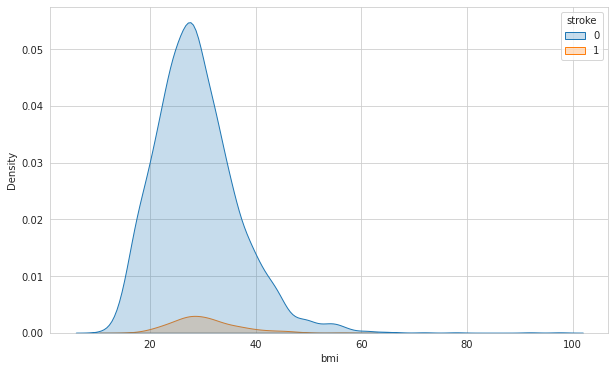

In [187]:
sns.kdeplot(x="bmi", hue="stroke", shade=True, data=df)

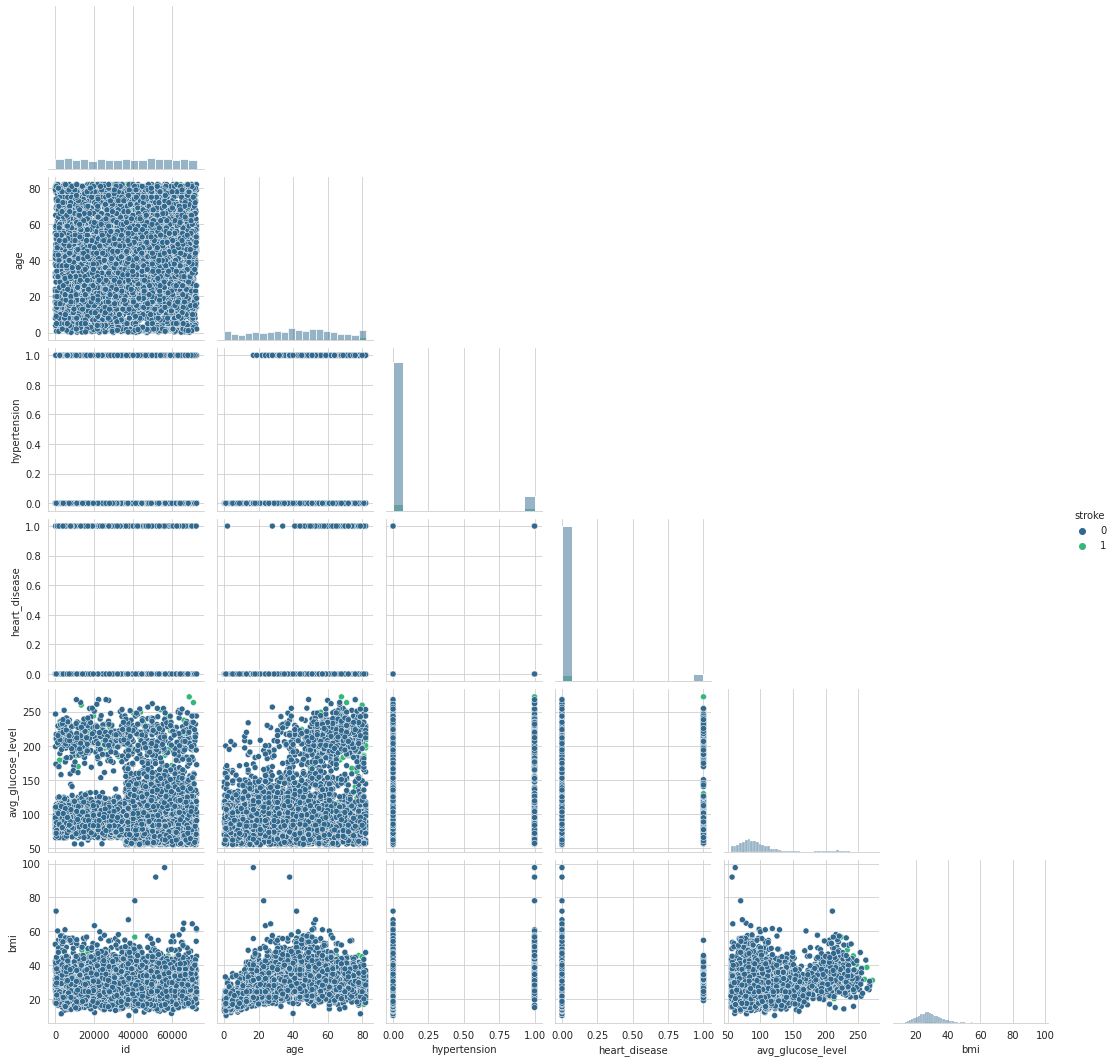

In [188]:
sns.pairplot(df, corner=True, hue="stroke", palette='viridis',diag_kind="hist")

In [189]:
# TARGET VS CATEGORICAL
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.000,0,1,Yes,Private,Urban,228.690,36.600,formerly smoked,1
1,51676,Female,61.000,0,0,Yes,Self-employed,Rural,202.210,NaN,never smoked,1
2,31112,Male,80.000,0,1,Yes,Private,Rural,105.920,32.500,never smoked,1
3,60182,Female,49.000,0,0,Yes,Private,Urban,171.230,34.400,smokes,1
4,1665,Female,79.000,1,0,Yes,Self-employed,Rural,174.120,24.000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.000,1,0,Yes,Private,Urban,83.750,NaN,never smoked,0
5106,44873,Female,81.000,0,0,Yes,Self-employed,Urban,125.200,40.000,never smoked,0
5107,19723,Female,35.000,0,0,Yes,Self-employed,Rural,82.990,30.600,never smoked,0
5108,37544,Male,51.000,0,0,Yes,Private,Rural,166.290,25.600,formerly smoked,0


In [190]:
df["work_type"].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

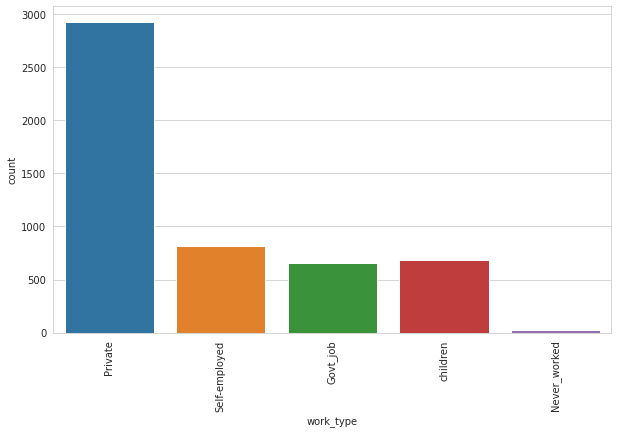

In [191]:
fig, ax = plt.subplots()
sns.countplot(x="work_type", data=df);
ax.set_xticklabels(df.work_type.unique(),rotation=90);

In [192]:
df.groupby("work_type")["stroke"].value_counts()

work_type      stroke
Govt_job       0          624
               1           33
Never_worked   0           22
Private        0         2776
               1          149
Self-employed  0          754
               1           65
children       0          685
               1            2
Name: stroke, dtype: int64

In [193]:
df.groupby("work_type")["stroke"].value_counts(normalize=True)

work_type      stroke
Govt_job       0        0.950
               1        0.050
Never_worked   0        1.000
Private        0        0.949
               1        0.051
Self-employed  0        0.921
               1        0.079
children       0        0.997
               1        0.003
Name: stroke, dtype: float64

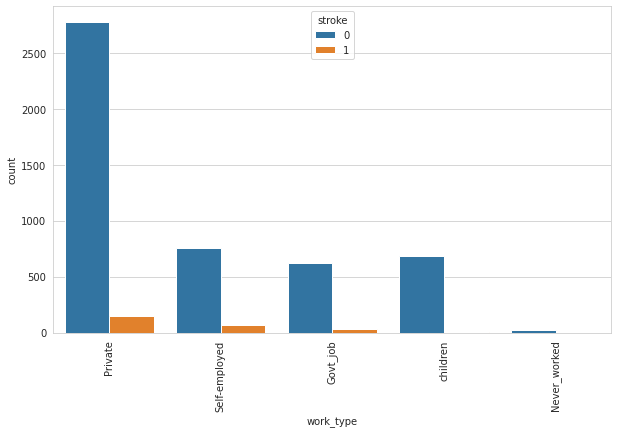

In [194]:
fig, ax = plt.subplots()
sns.countplot(x="work_type",hue="stroke", data=df);
ax.set_xticklabels(df.work_type.unique(), rotation=90);

In [195]:
# ever_married

In [196]:
df.groupby("ever_married")["stroke"].value_counts()

ever_married  stroke
No            0         1728
              1           29
Yes           0         3133
              1          220
Name: stroke, dtype: int64

In [197]:
df.groupby("ever_married")["stroke"].value_counts(normalize=True)

ever_married  stroke
No            0        0.983
              1        0.017
Yes           0        0.934
              1        0.066
Name: stroke, dtype: float64

In [198]:
df.groupby("hypertension")["stroke"].value_counts()

hypertension  stroke
0             0         4429
              1          183
1             0          432
              1           66
Name: stroke, dtype: int64

In [199]:
df.groupby("hypertension")["stroke"].value_counts(normalize=True)

hypertension  stroke
0             0        0.960
              1        0.040
1             0        0.867
              1        0.133
Name: stroke, dtype: float64

## Some analysis

### Dropping Similar & Unneccessary Features

In [200]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.000,0,1,Yes,Private,Urban,228.690,36.600,formerly smoked,1
1,51676,Female,61.000,0,0,Yes,Self-employed,Rural,202.210,NaN,never smoked,1
2,31112,Male,80.000,0,1,Yes,Private,Rural,105.920,32.500,never smoked,1
3,60182,Female,49.000,0,0,Yes,Private,Urban,171.230,34.400,smokes,1
4,1665,Female,79.000,1,0,Yes,Self-employed,Rural,174.120,24.000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.000,1,0,Yes,Private,Urban,83.750,NaN,never smoked,0
5106,44873,Female,81.000,0,0,Yes,Self-employed,Urban,125.200,40.000,never smoked,0
5107,19723,Female,35.000,0,0,Yes,Self-employed,Rural,82.990,30.600,never smoked,0
5108,37544,Male,51.000,0,0,Yes,Private,Rural,166.290,25.600,formerly smoked,0


In [201]:
df.drop(["Residence_type","ever_married"],axis=1,inplace=True)

### Handling with Missing Value

In [202]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
work_type              0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [203]:
df["bmi"].isnull()[:10]

0    False
1     True
2    False
3    False
4    False
5    False
6    False
7    False
8     True
9    False
Name: bmi, dtype: bool

In [204]:
df.loc[(df['stroke']==1)& (df["bmi"].notnull())].mean()   # 30.47

id                  37546.038
age                    67.713
hypertension            0.287
heart_disease           0.191
avg_glucose_level     134.571
bmi                    30.471
stroke                  1.000
dtype: float64

In [205]:
df.loc[(df['stroke']==0) & (df["bmi"].notnull())].mean() # 28

id                  37042.892
age                    41.760
hypertension            0.083
heart_disease           0.043
avg_glucose_level     104.004
bmi                    28.823
stroke                  0.000
dtype: float64

In [206]:
df.groupby("stroke")["bmi"].mean()

stroke
0   28.823
1   30.471
Name: bmi, dtype: float64

In [207]:
df1 = df.fillna(df.mean())
df1.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
work_type            0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Handling with Outliers

In [208]:
df_num = df.select_dtypes("number")
df_num.columns

Index(['id', 'age', 'avg_glucose_level', 'bmi'], dtype='object')

In [209]:
df.age.describe()

count   5110.000
mean      43.227
std       22.613
min        0.080
25%       25.000
50%       45.000
75%       61.000
max       82.000
Name: age, dtype: float64

In [210]:
df

,id,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.000,0,1,Private,228.690,36.600,formerly smoked,1
1,51676,Female,61.000,0,0,Self-employed,202.210,NaN,never smoked,1
2,31112,Male,80.000,0,1,Private,105.920,32.500,never smoked,1
3,60182,Female,49.000,0,0,Private,171.230,34.400,smokes,1
4,1665,Female,79.000,1,0,Self-employed,174.120,24.000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.000,1,0,Private,83.750,NaN,never smoked,0
5106,44873,Female,81.000,0,0,Self-employed,125.200,40.000,never smoked,0
5107,19723,Female,35.000,0,0,Self-employed,82.990,30.600,never smoked,0
5108,37544,Male,51.000,0,0,Private,166.290,25.600,formerly smoked,0


In [211]:
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"],
                   dtype = "category")

df["NewBMI"] = NewBMI
df.loc[df["bmi"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["bmi"] > 18.5) & (df["bmi"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["bmi"] > 24.9) & (df["bmi"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["bmi"] > 29.9) & (df["bmi"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["bmi"] > 34.9) & (df["bmi"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["bmi"] > 39.9 ,"NewBMI"] = NewBMI[5]

NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")

df["NewGlucose"] = NewGlucose
df.loc[df["avg_glucose_level"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["avg_glucose_level"] > 70) & (df["avg_glucose_level"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["avg_glucose_level"] > 99) & (df["avg_glucose_level"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["avg_glucose_level"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [212]:
df.age.describe()

count   5110.000
mean      43.227
std       22.613
min        0.080
25%       25.000
50%       45.000
75%       61.000
max       82.000
Name: age, dtype: float64

In [213]:
NewAge = pd.Series(["Child", "Young", "Middle-Aged", "Old", "Too-Old"], dtype = "category")
df["NewAge"] = NewAge
df.loc[df["age"] <= 20, "NewAge"] = NewAge[0]
df.loc[(df["age"] > 20) & (df["age"] <= 30), "NewAge"] = NewAge[1]
df.loc[(df["age"] > 30) & (df["age"] <= 40), "NewAge"] = NewAge[2]
df.loc[(df["age"] > 40) & (df["age"] <= 50), "NewAge"] = NewAge[3]
df.loc[df["age"] > 50 ,"NewAge"] = NewAge[4]

In [214]:
df.head()

,id,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,NewBMI,NewGlucose,NewAge
0,9046,Male,67.000,0,1,Private,228.690,36.600,formerly smoked,1,Obesity 2,Secret,Too-Old
1,51676,Female,61.000,0,0,Self-employed,202.210,NaN,never smoked,1,Normal,Secret,Too-Old
2,31112,Male,80.000,0,1,Private,105.920,32.500,never smoked,1,Obesity 1,Overweight,Too-Old
3,60182,Female,49.000,0,0,Private,171.230,34.400,smokes,1,Obesity 1,Secret,Old
4,1665,Female,79.000,1,0,Self-employed,174.120,24.000,never smoked,1,Normal,Secret,Too-Old


In [215]:
df.drop(["id","bmi","avg_glucose_level"], axis=1, inplace=True)

In [216]:
df.drop("age",axis=1,inplace=True)

In [217]:
df_.avg_glucose_level.describe()

count   5110.000
mean     106.148
std       45.284
min       55.120
25%       77.245
50%       91.885
75%      114.090
max      271.740
Name: avg_glucose_level, dtype: float64

<AxesSubplot:xlabel='avg_glucose_level'>

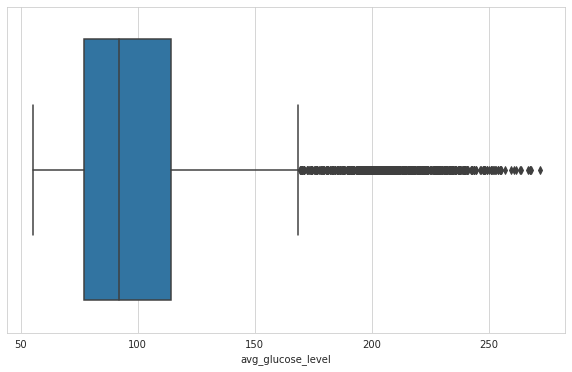

In [218]:
sns.boxplot(x=df_["avg_glucose_level"])

In [219]:
Q1 = df_["avg_glucose_level"].quantile(0.25)
Q3 = df_["avg_glucose_level"].quantile(0.75)
IQR = Q3-Q1
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR
lower_lim, upper_lim

(21.977500000000006, 169.35750000000002)

In [220]:
drop_index = df_.loc[((df_.avg_glucose_level < lower_lim) | (df_.avg_glucose_level > upper_lim))].index
len(drop_index)

627

In [221]:
df.head()

,gender,hypertension,heart_disease,work_type,smoking_status,stroke,NewBMI,NewGlucose,NewAge
0,Male,0,1,Private,formerly smoked,1,Obesity 2,Secret,Too-Old
1,Female,0,0,Self-employed,never smoked,1,Normal,Secret,Too-Old
2,Male,0,1,Private,never smoked,1,Obesity 1,Overweight,Too-Old
3,Female,0,0,Private,smokes,1,Obesity 1,Secret,Old
4,Female,1,0,Self-employed,never smoked,1,Normal,Secret,Too-Old


<AxesSubplot:xlabel='bmi', ylabel='Count'>

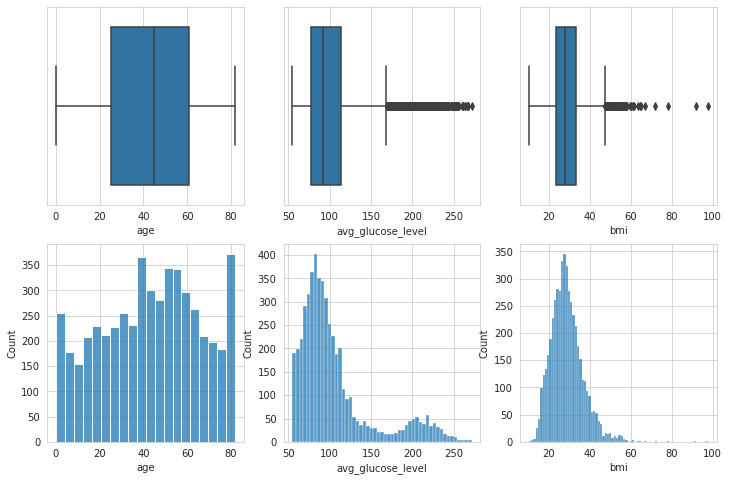

In [222]:
fig, ax = plt.subplots(ncols = 3,nrows=2, figsize=(12,8))
sns.boxplot(df_["age"], ax=ax[0,0])
sns.boxplot(df_["avg_glucose_level"], ax=ax[0,1])
sns.boxplot(df_["bmi"], ax=ax[0,2])


sns.histplot(df_["age"], ax=ax[1,0])
sns.histplot(df_["avg_glucose_level"], ax=ax[1,1])
sns.histplot(df_["bmi"], ax=ax[1,2])

### Final Step to Make the Dataset Ready for ML Models

In [223]:
df.head()

,gender,hypertension,heart_disease,work_type,smoking_status,stroke,NewBMI,NewGlucose,NewAge
0,Male,0,1,Private,formerly smoked,1,Obesity 2,Secret,Too-Old
1,Female,0,0,Self-employed,never smoked,1,Normal,Secret,Too-Old
2,Male,0,1,Private,never smoked,1,Obesity 1,Overweight,Too-Old
3,Female,0,0,Private,smokes,1,Obesity 1,Secret,Old
4,Female,1,0,Self-employed,never smoked,1,Normal,Secret,Too-Old


In [224]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [225]:
df_final = pd.get_dummies(df, drop_first= True)
df_final

,gender_Male,gender_Other,hypertension_1,heart_disease_1,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret,NewAge_Middle-Aged,NewAge_Old,NewAge_Too-Old,NewAge_Young
0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,1,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0
4,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5106,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
5107,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
5108,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [226]:
df_.stroke.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: object

In [227]:
df_final.stroke_1.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke_1, dtype: uint8

In [228]:
df_final.shape

(5110, 25)

In [229]:
df_.shape

(5110, 11)

In [230]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', 30)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [231]:
df_final.corr()

,gender_Male,gender_Other,hypertension_1,heart_disease_1,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret,NewAge_Middle-Aged,NewAge_Old,NewAge_Too-Old,NewAge_Young
gender_Male,1.000,-0.012,0.021,0.086,0.011,-0.033,-0.026,0.089,0.043,-0.099,0.011,0.009,0.057,-0.002,-0.066,0.029,0.039,-0.012,-0.030,0.005,0.044,-0.041,-0.027,0.023,-0.068
gender_Other,-0.012,1.000,-0.005,-0.003,-0.001,0.012,-0.006,-0.006,0.031,-0.011,-0.006,-0.003,-0.007,-0.005,-0.004,-0.009,-0.004,-0.006,-0.013,-0.007,0.029,-0.005,-0.006,-0.012,0.040
hypertension_1,0.021,-0.005,1.000,0.108,-0.022,-0.005,0.115,-0.130,0.059,0.065,0.031,0.128,0.067,0.039,0.074,-0.029,-0.082,-0.031,-0.075,-0.029,0.153,-0.068,-0.036,0.262,-0.094
heart_disease_1,0.086,-0.003,0.108,1.000,-0.016,0.000,0.087,-0.092,0.067,-0.022,0.044,0.135,0.059,-0.004,-0.030,0.027,-0.063,-0.031,-0.066,-0.024,0.136,-0.091,-0.059,0.250,-0.080
work_type_Never_worked,0.011,-0.001,-0.022,-0.016,1.000,-0.076,-0.029,-0.026,-0.030,0.036,-0.028,-0.015,-0.010,-0.022,0.002,-0.007,0.007,0.006,0.000,0.003,-0.009,-0.026,-0.027,-0.056,-0.013
work_type_Private,-0.033,0.012,-0.005,0.000,-0.076,1.000,-0.505,-0.456,0.026,0.105,0.100,0.012,0.050,0.057,0.071,0.073,-0.250,-0.013,0.013,-0.018,0.014,0.141,0.058,-0.016,0.190
work_type_Self-employed,-0.026,-0.006,0.115,0.087,-0.029,-0.505,1.000,-0.172,0.093,0.031,-0.004,0.062,0.048,0.007,-0.003,0.052,-0.101,0.003,-0.030,-0.026,0.062,-0.063,-0.007,0.271,-0.101
work_type_children,0.089,-0.006,-0.130,-0.092,-0.026,-0.456,-0.172,1.000,-0.161,-0.238,-0.165,-0.084,-0.165,-0.115,-0.113,-0.178,0.563,0.018,0.019,0.049,-0.092,-0.154,-0.162,-0.333,-0.136
smoking_status_formerly smoked,0.043,0.031,0.059,0.067,-0.030,0.026,0.093,-0.161,1.000,-0.351,-0.196,0.065,0.068,0.027,0.027,0.017,-0.099,-0.007,-0.020,-0.023,0.055,-0.030,-0.001,0.205,-0.048
smoking_status_never smoked,-0.099,-0.011,0.065,-0.022,0.036,0.105,0.031,-0.238,-0.351,1.000,-0.328,-0.004,0.035,0.033,0.029,0.063,-0.148,0.006,-0.015,-0.012,0.025,0.052,0.033,0.036,0.058


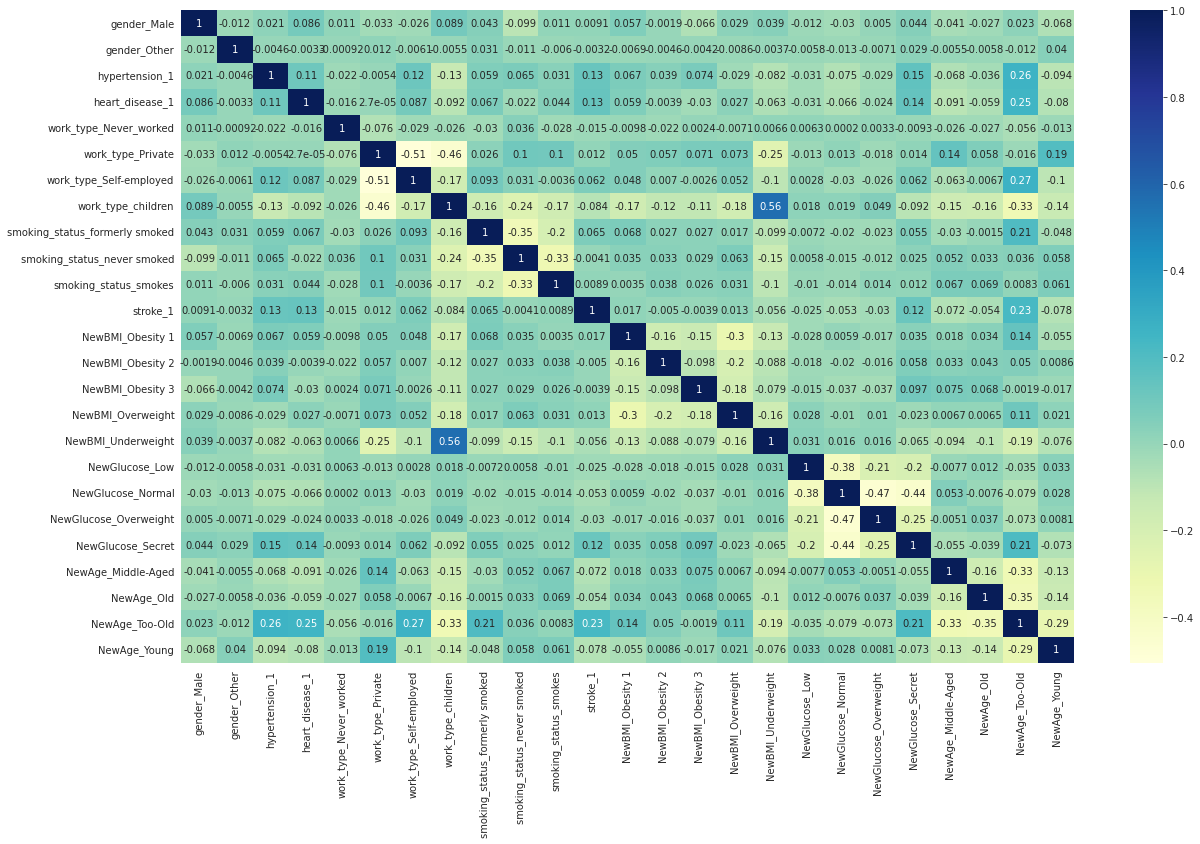

In [232]:
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df_final.corr(), annot=True,cmap="YlGnBu", fmt='.2g');

In [233]:
df_str_corr = df_final.corr()[["stroke_1"]].sort_values(by="stroke_1",ascending=False).drop('stroke_1', axis = 0)
df_str_corr

,stroke_1
NewAge_Too-Old,0.226
heart_disease_1,0.135
hypertension_1,0.128
NewGlucose_Secret,0.120
smoking_status_formerly smoked,0.065
work_type_Self-employed,0.062
NewBMI_Obesity 1,0.017
NewBMI_Overweight,0.013
work_type_Private,0.012
gender_Male,0.009


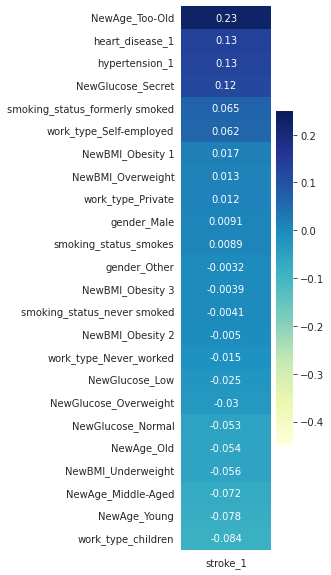

In [234]:
plt.figure(figsize=(2, 10))
sns.heatmap(df_str_corr, annot= True, vmin = -0.45, vmax=0.25, cmap="YlGnBu");

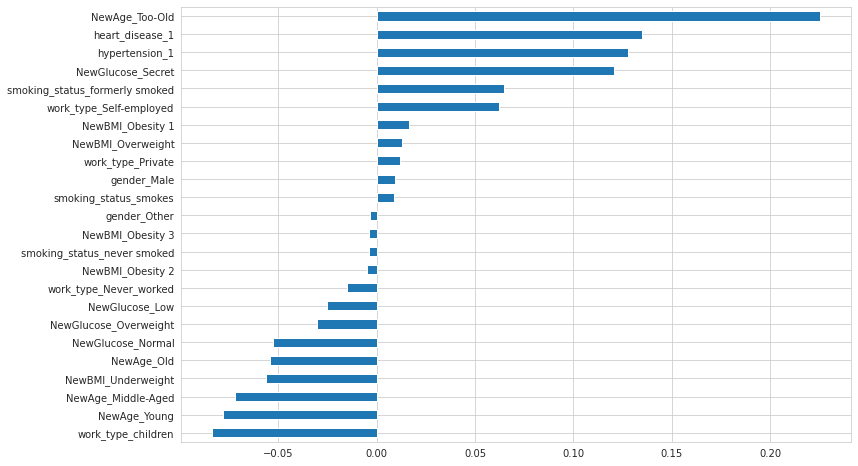

In [235]:
plt.figure(figsize=(12,8))
df_str_corr["stroke_1"].sort_values().plot.barh();